# Pattern Mining
## Library


In [41]:
source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myPreprocessing.R")
loadlibrary("arules")
loadlibrary("arulesViz")
loadlibrary("arulesSequences")

data(AdultUCI)
dim(AdultUCI)

[1] 48842    15

## Removing attributes

In [42]:
AdultUCI$fnlwgt <- NULL
AdultUCI$"education-num" <- NULL


## Conceptual Hierarchy and Binning

In [43]:
AdultUCI$age <- ordered(cut(AdultUCI$age, c(15,25,45,65,100)),
                              labels = c("Young", "Middle-aged", "Senior", "Old"))

AdultUCI$"hours-per-week" <- ordered(cut(AdultUCI$"hours-per-week",
                                             c(0,25,40,60,168)),
                                         labels = c("Part-time", "Full-time", "Over-time", "Workaholic"))

AdultUCI$"capital-gain" <- ordered(cut(AdultUCI$"capital-gain",
                                           c(-Inf,0,median(AdultUCI$"capital-gain"[AdultUCI$"capital-gain">0]),
                                             Inf)), labels = c("None", "Low", "High"))

AdultUCI$"capital-loss" <- ordered(cut(AdultUCI$"capital-loss",
                                           c(-Inf,0, median(AdultUCI$"capital-loss"[AdultUCI$"capital-loss">0]),
                                             Inf)), labels = c("None", "Low", "High"))

head(AdultUCI)

age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
Middle-aged,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,Low,None,Full-time,United-States,small
Senior,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,None,None,Part-time,United-States,small
Middle-aged,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,None,None,Full-time,United-States,small
Senior,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,None,None,Full-time,United-States,small
Middle-aged,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,None,None,Full-time,Cuba,small
Middle-aged,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,None,None,Full-time,United-States,small


## Convert to transactions

In [44]:
AdultTrans <- as(AdultUCI, "transactions")


## A Priori


In [45]:
rules <- apriori(AdultTrans, parameter=list(supp = 0.5, conf = 0.9, minlen=2, maxlen= 10, target = "rules"), appearance=list(rhs = c("capital-gain=None"),default="lhs"),control=NULL)
rules_a <- as(rules, "data.frame")
head(rules_a)



Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5     0.5      2
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 24421 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[115 item(s), 48842 transaction(s)] done [0.04s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.02s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [18 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


rules,support,confidence,lift,count
{hours-per-week=Full-time} => {capital-gain=None},0.5435895,0.9290688,1.0127342,26550
{sex=Male} => {capital-gain=None},0.6050735,0.9051455,0.9866565,29553
{workclass=Private} => {capital-gain=None},0.6413742,0.9239073,1.0071078,31326
{race=White} => {capital-gain=None},0.7817862,0.9143240,0.9966616,38184
{native-country=United-States} => {capital-gain=None},0.8219565,0.9159062,0.9983862,40146
{capital-loss=None} => {capital-gain=None},0.8706646,0.9133376,0.9955863,42525


## Analysis of Rules

In [46]:
irules <- inspect(rules)

     lhs                               rhs                   support confidence      lift count
[1]  {hours-per-week=Full-time}     => {capital-gain=None} 0.5435895  0.9290688 1.0127342 26550
[2]  {sex=Male}                     => {capital-gain=None} 0.6050735  0.9051455 0.9866565 29553
[3]  {workclass=Private}            => {capital-gain=None} 0.6413742  0.9239073 1.0071078 31326
[4]  {race=White}                   => {capital-gain=None} 0.7817862  0.9143240 0.9966616 38184
[5]  {native-country=United-States} => {capital-gain=None} 0.8219565  0.9159062 0.9983862 40146
[6]  {capital-loss=None}            => {capital-gain=None} 0.8706646  0.9133376 0.9955863 42525
[7]  {capital-loss=None,                                                                       
      hours-per-week=Full-time}     => {capital-gain=None} 0.5191638  0.9259787 1.0093657 25357
[8]  {race=White,                                                                              
      sex=Male}                     => {

In [47]:
imrules <- interestMeasure(rules, transactions = AdultTrans)
head(imrules)

support,count,coverage,confidence,lift,leverage,hyperLift,hyperConfidence,fishersExactTest,improvement,...,casualSupport,casualConfidence,leastContradiction,centeredConfidence,varyingLiaison,yuleQ,yuleY,lerman,implicationIndex,importance
0.5435895,26550,0.5850907,0.9290688,1.0127342,0.006835121,1.0100434,1.000000e+00,1.121041e-28,Inf,...,1.419475,0.9999976,0.5925413,0.011682156,0.012734168,0.1805312,0.09101332,2.0618407,-6.870784,0.013370119
0.6050735,29553,0.6684820,0.9051455,0.9866565,-0.008183018,0.9844437,4.037659e-47,1.000000e+00,Inf,...,1.459052,0.9999966,0.6595621,-0.012241193,-0.013343548,-0.2604097,-0.13249043,-2.3093466,7.695561,-0.017351596
0.6413742,31326,0.6941976,0.9239073,1.0071078,0.004526583,1.0050048,1.000000e+00,4.115642e-15,Inf,...,1.505938,0.9999973,0.6991318,0.006520598,0.007107796,0.1343742,0.06749314,1.2535725,-4.177348,0.010154765
0.7817862,38184,0.8550428,0.9143240,0.9966616,-0.002618696,0.9953600,3.318642e-10,1.000000e+00,Inf,...,1.625916,0.9999966,0.8521883,-0.003062649,-0.003338449,-0.1518210,-0.07635304,-0.6534489,2.177523,-0.009873694
0.8219565,40146,0.8974243,0.9159062,0.9983862,-0.001328626,0.9973170,1.488781e-04,9.998511e-01,Inf,...,1.663875,0.9999966,0.8959761,-0.001480488,-0.001613810,-0.1016143,-0.05093898,-0.3236118,1.078389,-0.006719212
0.8706646,42525,0.9532779,0.9133376,0.9955863,-0.003859867,0.9948765,0.000000e+00,1.000000e+00,Inf,...,1.705438,0.9999964,0.9490705,-0.004049047,-0.004413675,-1.0000000,-0.99999963,-0.9121852,3.039724,-0.039186904


In [48]:
rules.sorted <- sort(rules, by="lift")
inspect(rules.sorted)

     lhs                               rhs                   support confidence      lift count
[1]  {hours-per-week=Full-time}     => {capital-gain=None} 0.5435895  0.9290688 1.0127342 26550
[2]  {capital-loss=None,                                                                       
      hours-per-week=Full-time}     => {capital-gain=None} 0.5191638  0.9259787 1.0093657 25357
[3]  {workclass=Private}            => {capital-gain=None} 0.6413742  0.9239073 1.0071078 31326
[4]  {workclass=Private,                                                                       
      native-country=United-States} => {capital-gain=None} 0.5689570  0.9218444 1.0048592 27789
[5]  {workclass=Private,                                                                       
      race=White}                   => {capital-gain=None} 0.5472339  0.9208931 1.0038221 26728
[6]  {workclass=Private,                                                                       
      capital-loss=None}            => {

## Removing redundant rules

In [49]:
subset.matrix <- is.subset(rules.sorted, rules.sorted)
subset.matrix[lower.tri(subset.matrix, diag=TRUE)] <- FALSE
redundant <- colSums(subset.matrix, na.rm=TRUE) >= 1
which(redundant)


{capital-gain=None,capital-loss=None,hours-per-week=Full-time} 
                                                                                   2 
                  {workclass=Private,capital-gain=None,native-country=United-States} 
                                                                                   4 
                                    {workclass=Private,race=White,capital-gain=None} 
                                                                                   5 
                             {workclass=Private,capital-gain=None,capital-loss=None} 
                                                                                   6 
{workclass=Private,capital-gain=None,capital-loss=None,native-country=United-States} 
                                                                                   7 
                  {workclass=Private,race=White,capital-gain=None,capital-loss=None} 
                                                                                   8 
                         {race=White,capital-gain=None,native-country=United-States} 
                                                                                  12 
                  {capital-gain=None,capital-loss=None,native-country=United-States} 
                                                                                  13 
                                    {race=White,capital-gain=None,capital-loss=None} 
                                                                                  14 
       {race=White,capital-gain=None,capital-loss=None,native-country=United-States} 
                                                                                  15 
                           {sex=Male,capital-gain=None,native-country=United-States} 
                                                                                  17 
                                             {race=White,sex=Male,capital-gain=None} 
                                                                                  18

In [50]:
rules.pruned <- rules.sorted[!redundant]
inspect(rules.pruned)


    lhs                               rhs                 support   confidence
[1] {hours-per-week=Full-time}     => {capital-gain=None} 0.5435895 0.9290688 
[2] {workclass=Private}            => {capital-gain=None} 0.6413742 0.9239073 
[3] {native-country=United-States} => {capital-gain=None} 0.8219565 0.9159062 
[4] {race=White}                   => {capital-gain=None} 0.7817862 0.9143240 
[5] {capital-loss=None}            => {capital-gain=None} 0.8706646 0.9133376 
[6] {sex=Male}                     => {capital-gain=None} 0.6050735 0.9051455 
    lift      count
[1] 1.0127342 26550
[2] 1.0071078 31326
[3] 0.9983862 40146
[4] 0.9966616 38184
[5] 0.9955863 42525
[6] 0.9866565 29553


## Rules visualization

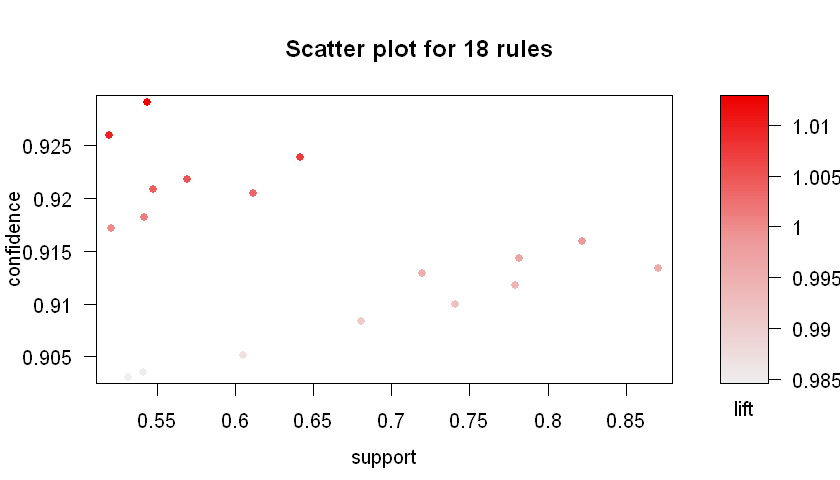

In [51]:
options(repr.plot.width=7, repr.plot.height=4)
plot(rules)


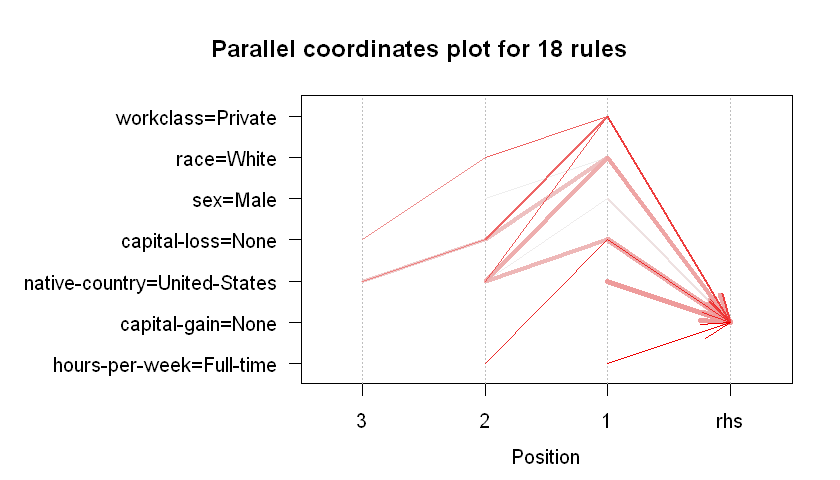

In [52]:
options(repr.plot.width=7, repr.plot.height=4)
plot(rules, method="paracoord", control=list(reorder=TRUE))

# Sequence Mining

In [53]:
x <- read_baskets(con = system.file("misc", "zaki.txt", package = "arulesSequences"), info = c("sequenceID","eventID","SIZE"))
as(x, "data.frame")


items,sequenceID,eventID,SIZE
"{C,D}",1,10,2
"{A,B,C}",1,15,3
"{A,B,F}",1,20,3
"{A,C,D,F}",1,25,4
"{A,B,F}",2,15,3
{E},2,20,1
"{A,B,F}",3,10,3
"{D,G,H}",4,10,3
"{B,F}",4,20,2
"{A,G,H}",4,25,3


In [54]:
s1 <- cspade(x, parameter = list(support = 0.4), control = list(verbose = TRUE))
as(s1, "data.frame")



parameter specification:
support : 0.4
maxsize :  10
maxlen  :  10

algorithmic control:
bfstype  : FALSE
verbose  :  TRUE
summary  : FALSE
tidLists : FALSE

preprocessing ... 1 partition(s), 0 MB [0.17s]
mining transactions ... 0 MB [0.09s]
reading sequences ... [0s]

total elapsed time: 0.26s


sequence,support
<{A}>,1.00
<{B}>,1.00
<{D}>,0.50
<{F}>,1.00
"<{A,F}>",0.75
"<{B,F}>",1.00
"<{D},{F}>",0.50
"<{D},{B,F}>",0.50
"<{A,B,F}>",0.75
"<{A,B}>",0.75
